# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Data Boot Camp © 2018. All Rights Reserved.


# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
for city in cities:
    print(city)

caluquembe
victoria
punta arenas
mataura
hobart
tuktoyaktuk
solsvik
rikitea
buala
illoqqortoormiut
namatanai
sijunjung
ushuaia
thabazimbi
vaini
vestmannaeyjar
upernavik
marcona
ribeira grande
brynmawr
busselton
beringovskiy
hermanus
qaanaaq
egvekinot
riesa
nishihara
barentsburg
dunedin
nuevo casas grandes
butaritari
comodoro rivadavia
odweyne
pushkino
mount gambier
ojinaga
sorada
arlit
pali
bayir
bredasdorp
wilmington
taolanaro
sarandi
damietta
longyearbyen
terra santa
xghajra
cockburn town
daru
provideniya
innisfail
eydhafushi
mancio lima
albany
zarechnyy
atuona
yulara
puerto ayora
grand gaube
bluff
las lomas
kibre mengist
hamilton
ixtapa
abu dhabi
barrow
college
acapetahua
kapaa
kahului
beloha
wanning
vestmanna
torbat-e jam
thompson
khorramshahr
rocha
srednekolymsk
hithadhoo
tabas
bethel
fairview
milkovo
mpanda
tilichiki
morondava
port elizabeth
kondinskoye
lebu
broken hill
saint-augustin
souillac
hays
bilibino
cabo san lucas
sentyabrskiy
okhotsk
jamestown
arraial do cabo
agucadoura


In [23]:
city_name = []
lat = []
lon = []
humidity = []
pressure = []
temp = []
temp_max = []
temp_min = []
clouds = []
wind = []
weather_data = []

# Build the endpoint URL
#for city in cities:
url = ('http://api.openweathermap.org/data/2.5/weather')
x = 0

for city in cities:
    print(f"Making request number: {x} for city: {city}")
    search_url = f"{url}?q={city}&appid={weather_api_key}"
    response = requests.get(search_url).json()
    print(search_url)
    weather_data.append(response)
    x = x + 1
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        pressure.append(response["main"]["pressure"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        temp_min.append(response["main"]["temp_min"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])

    except:
        print(f"Error pulling weather data for {city}")


Making request number: 0 for city: caluquembe
http://api.openweathermap.org/data/2.5/weather?q=caluquembe&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 1 for city: victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 2 for city: punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 3 for city: mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 4 for city: hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 5 for city: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 6 for city: solsvik
http://api.openweathermap.org/data/2.5/weather?q=solsvik&appid=6869e5921ae78c2a335936eed5c39158
Err

http://api.openweathermap.org/data/2.5/weather?q=zarechnyy&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 56 for city: atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 57 for city: yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 58 for city: puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 59 for city: grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 60 for city: bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 61 for city: las lomas
http://api.openweathermap.org/data/2.5/weather?q=las lomas&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 62 for city: kibre mengis

http://api.openweathermap.org/data/2.5/weather?q=elko&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 113 for city: saint-paul
http://api.openweathermap.org/data/2.5/weather?q=saint-paul&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 114 for city: east london
http://api.openweathermap.org/data/2.5/weather?q=east london&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 115 for city: mys shmidta
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&appid=6869e5921ae78c2a335936eed5c39158
Error pulling weather data for mys shmidta
Making request number: 116 for city: port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 117 for city: new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 118 for city: pucallpa
http://api.openweathermap.org/data/2.5/weather?q=pucallpa&appid=6869e5921ae

http://api.openweathermap.org/data/2.5/weather?q=kavieng&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 170 for city: asmar
http://api.openweathermap.org/data/2.5/weather?q=asmar&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 171 for city: buta
http://api.openweathermap.org/data/2.5/weather?q=buta&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 172 for city: kavaratti
http://api.openweathermap.org/data/2.5/weather?q=kavaratti&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 173 for city: wukari
http://api.openweathermap.org/data/2.5/weather?q=wukari&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 174 for city: riyadh
http://api.openweathermap.org/data/2.5/weather?q=riyadh&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 175 for city: bose
http://api.openweathermap.org/data/2.5/weather?q=bose&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 176 for city: cape town
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?q=pokhara&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 227 for city: coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 228 for city: vaitupu
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&appid=6869e5921ae78c2a335936eed5c39158
Error pulling weather data for vaitupu
Making request number: 229 for city: xining
http://api.openweathermap.org/data/2.5/weather?q=xining&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 230 for city: benalla
http://api.openweathermap.org/data/2.5/weather?q=benalla&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 231 for city: terney
http://api.openweathermap.org/data/2.5/weather?q=terney&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 232 for city: sur
http://api.openweathermap.org/data/2.5/weather?q=sur&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 233 fo

http://api.openweathermap.org/data/2.5/weather?q=sibolga&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 283 for city: touros
http://api.openweathermap.org/data/2.5/weather?q=touros&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 284 for city: mareeba
http://api.openweathermap.org/data/2.5/weather?q=mareeba&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 285 for city: sawtell
http://api.openweathermap.org/data/2.5/weather?q=sawtell&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 286 for city: farafangana
http://api.openweathermap.org/data/2.5/weather?q=farafangana&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 287 for city: mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 288 for city: benguela
http://api.openweathermap.org/data/2.5/weather?q=benguela&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 289 for city: praia da 

http://api.openweathermap.org/data/2.5/weather?q=andros&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 339 for city: tabasalu
http://api.openweathermap.org/data/2.5/weather?q=tabasalu&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 340 for city: winschoten
http://api.openweathermap.org/data/2.5/weather?q=winschoten&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 341 for city: avera
http://api.openweathermap.org/data/2.5/weather?q=avera&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 342 for city: pisco
http://api.openweathermap.org/data/2.5/weather?q=pisco&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 343 for city: agadez
http://api.openweathermap.org/data/2.5/weather?q=agadez&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 344 for city: biloela
http://api.openweathermap.org/data/2.5/weather?q=biloela&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 345 for city: fortuna
http://api.openw

http://api.openweathermap.org/data/2.5/weather?q=plouzane&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 395 for city: laguna
http://api.openweathermap.org/data/2.5/weather?q=laguna&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 396 for city: torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 397 for city: edson
http://api.openweathermap.org/data/2.5/weather?q=edson&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 398 for city: kaitong
http://api.openweathermap.org/data/2.5/weather?q=kaitong&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 399 for city: nalut
http://api.openweathermap.org/data/2.5/weather?q=nalut&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 400 for city: gazanjyk
http://api.openweathermap.org/data/2.5/weather?q=gazanjyk&appid=6869e5921ae78c2a335936eed5c39158
Making request number: 401 for city: belyy yar
http://api.openweath

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [9]:
# Pretty print the json
pprint(weather_data)

[{'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -0.39, 'lon': -78.55},
  'dt': 1548813600,
  'id': 3652462,
  'main': {'humidity': 87,
           'pressure': 1027,
           'temp': 287.62,
           'temp_max': 288.15,
           'temp_min': 287.15},
  'name': 'San Cristobal',
  'sys': {'country': 'EC',
          'id': 8555,
          'message': 0.0033,
          'sunrise': 1548847408,
          'sunset': 1548891091,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 350, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -46.19, 'lon': 168.86},
  'dt': 1548816020,
  'id': 6201424,
  'main': {'grnd_level': 1016.47,
           'humidity': 56,
           'pressure': 1016.47,
           'sea_level': 1031.31,
           'temp': 300.19,
           'temp_max': 300.19

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Long": lon,
    "Humidity": humidity,
    "Pressure" : pressure, 
    "Temp" : temp,
    "Temp Max" : temp_max,
    "Temp Min" : temp_min,
    "Clouds" : clouds,
    "Wind" : wind
    }


weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv(path_or_buf = output_data_file)


In [26]:
weather_df.head(10)

,City,Lat,Long,Humidity,Pressure,Temp,Temp Max,Temp Min,Clouds,Wind
0,Caluquembe,-13.78,14.68,90,857.19,287.090,287.090,287.090,20,0.41
1,Victoria,5.28,115.24,83,1012.00,301.150,301.150,301.150,75,3.60
2,Punta Arenas,-53.16,-70.91,86,993.00,277.150,277.150,277.150,40,7.20
3,Mataura,-46.19,168.86,56,1016.47,300.190,300.190,300.190,0,8.86
4,Hobart,-42.88,147.33,26,1003.00,300.150,300.150,300.150,0,7.20
5,Tuktoyaktuk,69.44,-133.03,84,1015.00,257.150,257.150,257.150,90,3.60
6,Rikitea,-23.12,-134.97,100,1029.93,300.115,300.115,300.115,0,5.36
7,Buala,-8.15,159.59,82,1011.28,303.515,303.515,303.515,64,4.11
8,Namatanai,-3.66,152.44,93,1015.34,303.090,303.090,303.090,36,3.76
9,Sijunjung,-0.69,100.95,96,964.92,295.190,295.190,295.190,92,1.21


In [48]:
weather_df.dtypes

City         object
Lat         float64
Long        float64
Humidity      int64
Pressure    float64
Temp          int64
Temp Max    float64
Temp Min    float64
Clouds        int64
Wind        float64
dtype: object

In [59]:
weather_df["Temp"] = weather_df["Temp"].astype(int)
weather_df["Temp Max"] = weather_df["Temp Max"].astype(int)
weather_df["Temp Min"] = weather_df["Temp Min"].astype(int)
weather_df["Pressure"] = weather_df["Pressure"].astype(int)

weather_df["Temp"] = (weather_df["Temp"] - 273.15) * 9/5 + 32
weather_df["Temp Max"] = (weather_df["Temp Max"] - 273.15) * 9/5 + 32
weather_df["Temp Min"] = (weather_df["Temp Min"] - 273.15) * 9/5 + 32

In [51]:
weather_df.dtypes

City         object
Lat         float64
Long        float64
Humidity      int64
Pressure    float64
Temp          int64
Temp Max      int64
Temp Min      int64
Clouds        int64
Wind        float64
dtype: object

In [50]:
weather_df.count()

City        365
Lat         365
Long        365
Humidity    365
Pressure    365
Temp        365
Temp Max    365
Temp Min    365
Clouds      365
Wind        365
dtype: int64

In [57]:
weather_df.head(10)

,City,Lat,Long,Humidity,Pressure,Temp,Temp Max,Temp Min,Clouds,Wind
0,Caluquembe,-13.78,14.68,90,857.19,56.93,56.93,56.93,20,0.41
1,Victoria,5.28,115.24,83,1012.00,82.13,82.13,82.13,75,3.60
2,Punta Arenas,-53.16,-70.91,86,993.00,38.93,38.93,38.93,40,7.20
3,Mataura,-46.19,168.86,56,1016.47,80.33,80.33,80.33,0,8.86
4,Hobart,-42.88,147.33,26,1003.00,80.33,80.33,80.33,0,7.20
5,Tuktoyaktuk,69.44,-133.03,84,1015.00,2.93,2.93,2.93,90,3.60
6,Rikitea,-23.12,-134.97,100,1029.93,80.33,80.33,80.33,0,5.36
7,Buala,-8.15,159.59,82,1011.28,85.73,85.73,85.73,64,4.11
8,Namatanai,-3.66,152.44,93,1015.34,85.73,85.73,85.73,36,3.76
9,Sijunjung,-0.69,100.95,96,964.92,71.33,71.33,71.33,92,1.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


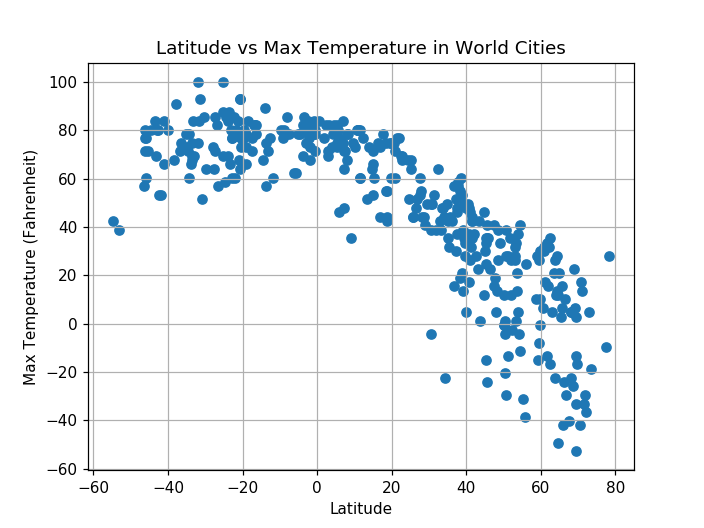

In [58]:
plt.scatter(weather_df["Lat"], weather_df["Temp Max"],  marker="o")

plt.title("Latitude vs Max Temperature in World Cities")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTempInWorldCities.png")



Analysis: Temperature increases as latitude increases towards the equator.  However temperature decreases as city latitude starts into the northern hemisphere.    

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


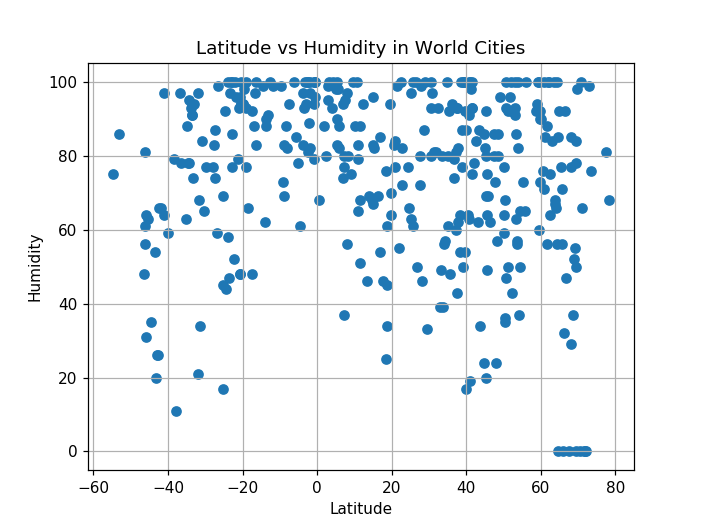

In [34]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"],  marker="o")

plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("HumidityInWorldCities.png")



Analysis: There is no relationship between latitude and humidity but interestingly a small group of cities between 60 and 80 degrees latitude experience no humitidy.  

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


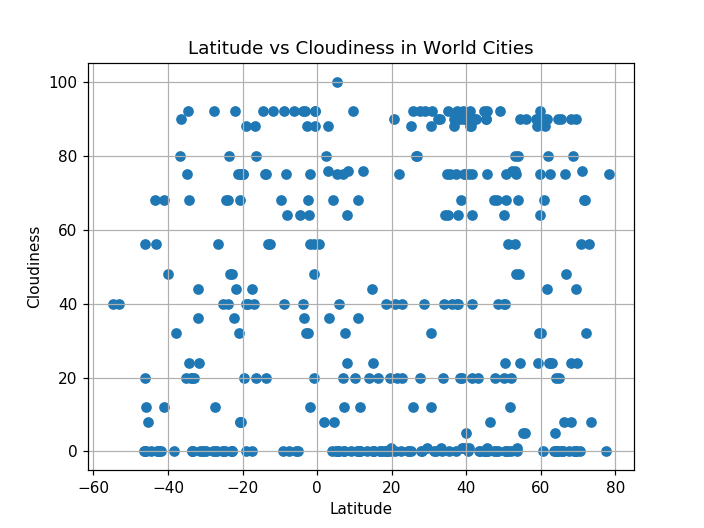

In [36]:
plt.scatter(weather_df["Lat"], weather_df["Clouds"],  marker="o")

plt.title("Latitude vs Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CloudinessInWorldCities.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


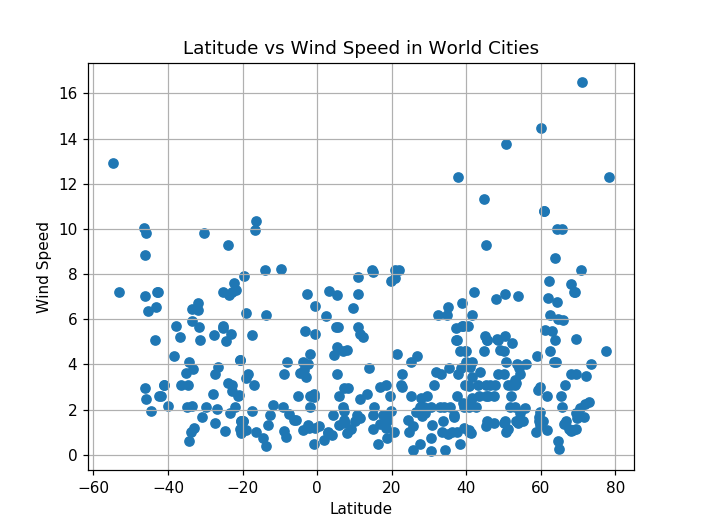

In [37]:
plt.scatter(weather_df["Lat"], weather_df["Wind"],  marker="o")

plt.title("Latitude vs Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeedInWorldCities.png")

Analysis: There is no strong relationship between wind speed and latitude but high wind speed outliers occur at the latitudinal extremes